In [40]:
#Description : Program uses the Moving Average Convergence and Divergence (MACD) crossover
#to dtermine when to buy or sell the stock.
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web


In [41]:
#Get the data
BTC = web.DataReader('BTCUSD=X', data_source='yahoo', start='2020-01-10')
#Show the data
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-10,7726.774902,8166.551758,7878.308594,8166.551758,0,8166.551758
2020-01-13,8079.698730,8197.790039,8189.772949,8144.190918,0,8144.190918
2020-01-14,8140.935547,8879.511719,8140.935547,8827.761719,0,8827.761719
2020-01-15,8657.184570,8890.113281,8825.346680,8807.010742,0,8807.010742
2020-01-16,8612.092773,8846.458008,8812.482422,8723.788086,0,8723.788086
...,...,...,...,...,...,...
2020-06-21,9296.868164,9655.072266,9300.915039,9648.719727,0,9648.719727
2020-06-22,9547.250977,9670.543945,9644.075195,9629.662109,0,9629.662109
2020-06-23,9278.236328,9680.364258,9632.148438,9313.614258,0,9313.614258


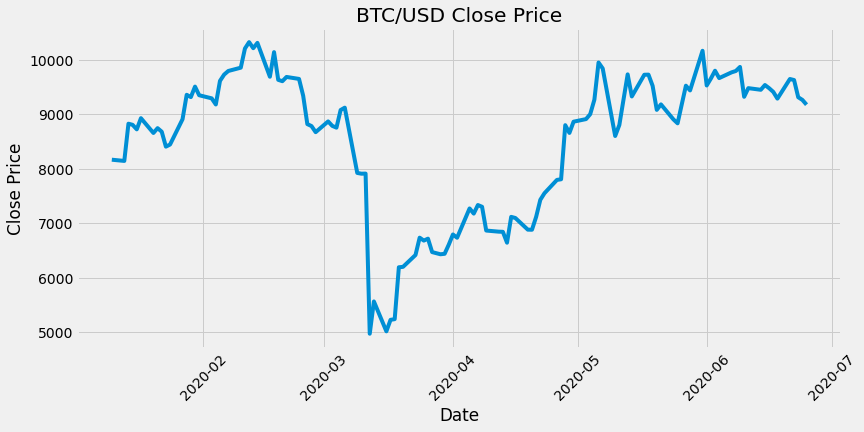

In [42]:
#Visualization the graph of BTC
plt.figure(figsize=(12.2,5.5))
plt.xticks(rotation=45)
plt.plot(BTC.index, BTC['Close'])
plt.title('BTC/USD Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [43]:
#Calculate the MACF and signal line indicator
#Calculate the short term exponential moving average (EMA)
ShortEMA = BTC.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA = BTC.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()       

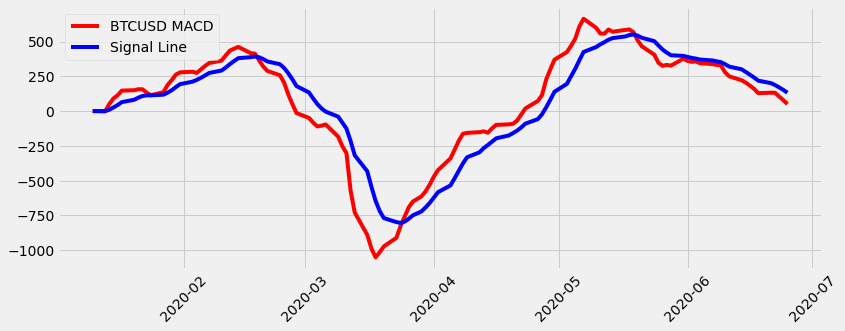

In [44]:
plt.figure(figsize=(12.2,4.5))

plt.plot(BTC.index, MACD, label ='BTCUSD MACD', color='red')
plt.plot(BTC.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


In [45]:
#Create new columns for the data
BTC['MACD'] = MACD
BTC['Signal_Line'] = signal
BTC

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal_Line
Date,,,,,,,,
2020-01-10,7726.774902,8166.551758,7878.308594,8166.551758,0,8166.551758,0.000000,0.000000
2020-01-13,8079.698730,8197.790039,8189.772949,8144.190918,0,8144.190918,-1.783771,-0.356754
2020-01-14,8140.935547,8879.511719,8140.935547,8827.761719,0,8827.761719,51.368880,9.988373
2020-01-15,8657.184570,8890.113281,8825.346680,8807.010742,0,8807.010742,90.771947,26.145088
2020-01-16,8612.092773,8846.458008,8812.482422,8723.788086,0,8723.788086,113.970012,43.710072
...,...,...,...,...,...,...,...,...
2020-06-21,9296.868164,9655.072266,9300.915039,9648.719727,0,9648.719727,132.233407,201.188285
2020-06-22,9547.250977,9670.543945,9644.075195,9629.662109,0,9629.662109,131.951006,187.340829
2020-06-23,9278.236328,9680.364258,9632.148438,9313.614258,0,9313.614258,105.014243,170.875512


In [52]:
#Create a function to signal when to buy and sell 
def buy_sell(signal):
    Buy=[]
    Sell=[]
    flag=-1
    
    for i in range(0,len(signal)):
        if signal['MACD'][i]>signal['Signal_Line'][i]:
            Sell.append(np.nan)
            if flag!= 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal_Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    
    return(Buy,Sell)
    
        

In [53]:
#Create buy and sell column
a = buy_sell(BTC)
BTC['Buy_Signal_Price'] = a[0]
BTC['Sell_Signal_Price'] = a[1]

In [54]:
#Show the data
BTC

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal_Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-10,7726.774902,8166.551758,7878.308594,8166.551758,0,8166.551758,0.000000,0.000000,NaN,NaN
2020-01-13,8079.698730,8197.790039,8189.772949,8144.190918,0,8144.190918,-1.783771,-0.356754,NaN,8144.190918
2020-01-14,8140.935547,8879.511719,8140.935547,8827.761719,0,8827.761719,51.368880,9.988373,8827.761719,NaN
2020-01-15,8657.184570,8890.113281,8825.346680,8807.010742,0,8807.010742,90.771947,26.145088,NaN,NaN
2020-01-16,8612.092773,8846.458008,8812.482422,8723.788086,0,8723.788086,113.970012,43.710072,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-06-21,9296.868164,9655.072266,9300.915039,9648.719727,0,9648.719727,132.233407,201.188285,NaN,NaN
2020-06-22,9547.250977,9670.543945,9644.075195,9629.662109,0,9629.662109,131.951006,187.340829,NaN,NaN
2020-06-23,9278.236328,9680.364258,9632.148438,9313.614258,0,9313.614258,105.014243,170.875512,NaN,NaN


In [ ]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(12.2,4.5))
plt.scatter(BTC.index, BTC['Buy_Signal_Price'], color='green', label='BUY', marker='^', alpha=1)
plt.scatter(BTC.index, BTC['Sell_Signal_Price'], color='red', label='SELL', marker='v', alpha=1)
plt.plot(BTC['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()
